<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий из HeadHunter
   

In [175]:
import pandas as pd
import psycopg2

In [176]:
DBNAME = 
USER = 
PASSWORD = 
HOST = 
PORT = 

In [177]:
connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    host=HOST,
    password=PASSWORD,
    port=PORT
)

# Юнит 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в нашей базе (вакансии находятся в таблице vacancies). 

In [178]:
# текст запроса
query_3_1 = f'''select *
    from vacancies
    
'''
vacancies_db = pd.read_sql_query(query_3_1, connection)


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [179]:
vacancies_db.describe(include=['object'])


,name,key_skills,schedule,experience,employment
count,49197,40741,49197,49197,49197
unique,21223,31218,5,4,4
top,Системный администратор,1С программирование,Полный день,От 1 года до 3 лет,Полная занятость
freq,1761,94,36424,26152,46069


2. Напишите запрос, который посчитает количество работодателей (таблица employers). 

In [180]:
# текст запроса
query_3_2 = f'''select *
    from employers
    
'''
employers_db = pd.read_sql_query(query_3_2, connection)


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [181]:
# результат запроса
employers_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23501 entries, 0 to 23500
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      23501 non-null  int64 
 1   name    23501 non-null  object
 2   area    23501 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 550.9+ KB


3. Посчитате с помощью запроса количество регионов (таблица areas).

In [182]:
# текст запроса
query_3_3 = f'''select *
    from areas
    
'''
areas_db = pd.read_sql_query(query_3_3, connection)


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [183]:
# результат запроса
areas_db.describe(include=['object'])

,name
count,1362
unique,1362
top,Тбилиси
freq,1


4. Посчитате с помощью запроса количество сфер деятельности в базе (таблица industries).

In [184]:
# текст запроса
query_3_4 = f'''select *
    from industries
    
'''
industries_db = pd.read_sql_query(query_3_4, connection)


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [185]:
# результат запроса
industries_db.describe(include=['object'])

,id,name
count,294,294
unique,294,294
top,7.540,Разработка программного обеспечения
freq,1,1


***

В базе данных содержится 49197 вакансий, из которых самая популярная - "Системный администратор". Вакансии находятся в 1362 населенных пунктах. Сотрудников ищут 23501 работодатель в 294 индустрии.

# Юнит 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area).
Отсортируйте по количеству вакансий в порядке убывания.

In [186]:
# текст запроса
query_4_1 = f'''select a.name area, count(v.id) cnt
    from areas a 
        join vacancies v on a.id = v.area_id
    group by a.id
    order by cnt desc
    
'''
vacancies_in_area_db = pd.read_sql_query(query_4_1, connection)


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [187]:
# результат запроса
vacancies_in_area_db.head(10)

,area,cnt
0,Москва,5333
1,Санкт-Петербург,2851
2,Минск,2112
3,Новосибирск,2006
4,Алматы,1892
5,Екатеринбург,1698
6,Нижний Новгород,1670
7,Казань,1415
8,Краснодар,1301
9,Самара,1144


2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [188]:
# текст запроса
query_4_2 = f'''select count(id) count_vac
    from vacancies
    where salary_from is not null or salary_to is not null
    group by id
    
    
'''
count_salary = pd.read_sql_query(query_4_2, connection)


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [189]:
# результат запроса
count_salary

,count_vac
0,1
1,1
2,1
3,1
4,1
...,...
24068,1
24069,1
24070,1
24071,1


3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого.

In [190]:
# текст запроса
vacancies_db.describe()

,id,salary_from,salary_to,area_id,employer_id
count,4.919700e+04,21485.000000,12690.000000,49197.000000,4.919700e+04
mean,5.535701e+07,71064.657901,110536.741923,378.184727,1.817791e+06
std,4.215213e+06,56646.897132,89104.795997,746.274918,1.954087e+06
min,6.555939e+06,30.000000,60.000000,1.000000,6.000000e+00
25%,5.465343e+07,35000.000000,50000.000000,12.000000,6.577200e+04
50%,5.512157e+07,50000.000000,80000.000000,72.000000,1.045513e+06
75%,5.544978e+07,90000.000000,150000.000000,159.000000,3.153012e+06
max,6.619644e+07,1000000.000000,1000000.000000,6458.000000,8.906438e+06


In [191]:
# результат запроса
vacancies_db['salary_from'].mean()
vacancies_db['salary_to'].mean()

110536.74192277384

4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [192]:
# текст запроса
query_4_4 = f'''select distinct schedule, employment, count(schedule), count(employment)
    from vacancies
    group by schedule, employment
    order by count(schedule) desc, count(employment) desc
    
    
'''
vacancies_schedule = pd.read_sql_query(query_4_4, connection)



c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [193]:
# результат запроса
vacancies_schedule

,schedule,employment,count,count
0,Полный день,Полная занятость,35367,35367
1,Удаленная работа,Полная занятость,7802,7802
2,Гибкий график,Полная занятость,1593,1593
3,Удаленная работа,Частичная занятость,1312,1312
4,Сменный график,Полная занятость,940,940
5,Полный день,Стажировка,569,569
6,Вахтовый метод,Полная занятость,367,367
7,Полный день,Частичная занятость,347,347
8,Гибкий график,Частичная занятость,312,312
9,Полный день,Проектная работа,141,141


5. Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта. 

In [194]:
# текст запроса
query_4_5 = f'''select distinct experience, count(experience)
    from vacancies
    group by experience
    order by count(experience) asc
    
'''
vacancies_experience = pd.read_sql_query(query_4_5, connection)


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [195]:
# результат запроса
vacancies_experience

,experience,count
0,Более 6 лет,1337
1,Нет опыта,7197
2,От 3 до 6 лет,14511
3,От 1 года до 3 лет,26152


Системный администратор             1761
Программист 1С                      1153
Бизнес-аналитик                      488
Специалист технической поддержки     457
Системный аналитик                   432
Аналитик                             404
Инженер-программист                  389
Программист 1C                       360
Frontend-разработчик                 242
Инженер технической поддержки        230
Name: name, dtype: int64


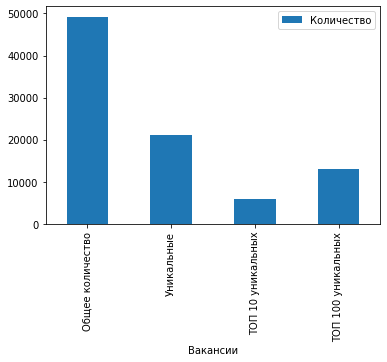

In [196]:
vac10 = vacancies_db['name'].value_counts().nlargest(10).sum()
print(vacancies_db['name'].value_counts().nlargest(10))
vac100 = vacancies_db['name'].value_counts().nlargest(100).sum()
vac_unique = vacancies_db['name'].nunique()
vac = vacancies_db['name'].value_counts().sum()
vacancies = pd.DataFrame([
    ['Общее количество', vac],
    ['Уникальные', vac_unique],
    ['ТОП 10 уникальных', vac10],
    ['ТОП 100 уникальных', vac100]
    ],
    columns=['Вакансии', 'Количество']
)
vacancies.plot(kind='bar', x='Вакансии');


В базе данных почти 50 тысяч вакансий, из них около половины с уникальными названиями. ТОП 100 наиболее упоминаемых составляют не более 1/3 от вакансий в базе данных. В 10 самых популярных вакансия Data Scientist не входит.
На 70% вакансий требуется сотрудник на полный день и полную занятость, ещё 15% ищут на полный день и удаленную работу. 
Ориентиры по заработной плате указаны только примерно в половине вакансий.
Наибольшее количество вакансий в Москве, в 10 крупнейших городах 43% вакансий.
Наиболее востребованы специалисты с опытом работы 1-3 года, больше половины всех вакансий. С опытом работы 1-6 лет 80% вакансий.
В среднем по базе данных зарплатная вилка по вакансиям в IT Индустрии составляет от 70 до 110 тысяч рублей.
Из имеющихся данных можно проанализировать примерную вилку по зарплате в целом в отрасли в разбивке по регионам. Так как половина названий вакансий уникальна, предположить уровень требований и зарплаты по конкретным специальностям не представляется возможным, кроме вакансий Системного администратора и Программиста 1С, как наиболее популярных (более 1 тыс. вакансий каждая).

***

# Юнит 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [197]:
# текст запроса
query_5_1 = f'''select e.name, count(v.id)
    from vacancies v
    join employers e on v.employer_id = e.id
    group by e.id
    order by count(v.id) desc
    
'''
employer_vac = pd.read_sql_query(query_5_1, connection)


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [198]:
# результат запроса
employer_vac.head(10)

,name,count
0,Яндекс,1933
1,Ростелеком,491
2,Тинькофф,444
3,СБЕР,428
4,Газпром нефть,331
5,ИК СИБИНТЕК,327
6,МТС,292
7,DataArt,247
8,Совкомбанк Технологии,204
9,Первый Бит,176


2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [199]:
# текст запроса
query_5_2 = f'''select a.name, count(v.id), count(e.id)
    from areas a
    full outer join vacancies v on v.area_id = a.id
    join employers e on a.id = e.area
    group by a.name
    order by count(v.id) asc, count(e.id) desc
    
'''
area_employers_vacancies = pd.read_sql_query(query_5_2, connection)


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [200]:
# результат запроса
area_employers_vacancies. head(10)

,name,count,count
0,Россия,0,410
1,Казахстан,0,207
2,Московская область,0,75
3,Краснодарский край,0,19
4,Ростовская область,0,18
5,Беларусь,0,18
6,Азербайджан,0,17
7,Нижегородская область,0,16
8,Республика Татарстан,0,16
9,Узбекистан,0,15


3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [201]:
# текст запроса
query_5_3 = f'''select distinct e.name, count(distinct v.area_id)
    from vacancies v
    join employers e on v.employer_id = e.id
    
    
    group by e.name
    order by count(distinct v.area_id) desc
    
'''
employers_vacancies = pd.read_sql_query(query_5_3, connection)


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [202]:
# результат запроса
employers_vacancies.head(20)

,name,count
0,Яндекс,181
1,Ростелеком,152
2,Спецремонт,116
3,Поляков Денис Иванович,88
4,ООО ЕФИН,71
5,Совкомбанк,63
6,МТС,55
7,"ЭФКО, Управляющая компания",49
8,КРОН,48
9,Почта России,48


4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности. 

In [203]:
# текст запроса
query_5_4 = f'''select count(distinct e.id)
    from employers e 
    left join employers_industries ei on e.id = ei.employer_id
    where ei.industry_id is null
    group by e.id
    
    
    
'''
eployers_industries = pd.read_sql_query(query_5_4, connection)



c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [204]:
# результат запроса
eployers_industries.count()


count    8419
dtype: int64

5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности. 

In [205]:
query_5_5 = f'''select e.name, count(ei.industry_id)
    from employers e 
    left join employers_industries ei on e.id = ei.employer_id
    group by e.name
    having count(ei.industry_id) = 4
    order by e.name asc
    
    
    
'''
eployers_industries_count = pd.read_sql_query(query_5_5, connection)


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [206]:
# результат запроса
eployers_industries_count.head(5)

,name,count
0,101 Интернет,4
1,21vek.by,4
2,2ГИС,4
3,2К,4
4,4 пикселя +,4


6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана Разработка программного обеспечения.


In [207]:
query_5_6 = f'''select count(e.id)
    from employers e 
    left join employers_industries ei on e.id = ei.employer_id
    join industries i on i.id = ei.industry_id
    group by e.id, i.name
    having i.name = 'Разработка программного обеспечения'
    order by e.name asc
    
    
    
'''
eployers_industries_soft = pd.read_sql_query(query_5_6, connection)

c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [208]:
# результат запроса
eployers_industries_soft.count()

count    3553
dtype: int64

7. Для компании «Яндекс» выведите список регионов-миллионников, в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

Список городов-милионников надо взять [отсюда](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8). 

Если возникнут трудности с этим задание посмотрите материалы модуля  PYTHON-17. Как получать данные из веб-источников и API. 

In [209]:
# код для получения списка городов-милионников
import requests
from bs4 import BeautifulSoup
url ='https://ru.wikipedia.org/wiki/Шаблон:Города-миллионеры_России'
response = requests.get(url)
page = BeautifulSoup(response.text, 'html.parser')
cities = page.find('ul').text
cities = list(cities.split("\n"))
cities_million=[]
for i in cities:
    word = i[2::]
    if word[0] == ' ':
        word = word[1::]
    cities_million.append(word)
cities_million


['Москва',
 'Санкт-Петербург',
 'Новосибирск',
 'Екатеринбург',
 'Казань',
 'Нижний Новгород',
 'Челябинск',
 'Красноярск',
 'Самара',
 'Уфа',
 'Ростов-на-Дону',
 'Омск',
 'Краснодар',
 'Воронеж',
 'Пермь',
 'Волгоград']

In [210]:
# текст запроса
query_5_7 = f'''select distinct a.name city, count(v.id) cnt
    from vacancies v
    join employers e on v.employer_id = e.id
    join areas a on v.area_id = a.id
    where e.name = 'Яндекс'
    
    group by a.name
    
    order by count(v.id) desc
    
'''
yandex_vacancies = pd.read_sql_query(query_5_7, connection)

c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [211]:
# результат запроса
def cities(args):
    if args in cities_million:
        return args
    else:
        return None
    
yandex_vacancies['city'] = yandex_vacancies['city'].apply(cities)
yandex_vacancies_copy = yandex_vacancies.dropna(how='any', axis=0)
yandex_vacancies_copy = yandex_vacancies_copy.append({'city':'total', 'cnt':yandex_vacancies_copy['cnt'].sum()}, ignore_index=True)
yandex_vacancies_copy

C:\Users\ACER\AppData\Local\Temp\ipykernel_10468\3074542509.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yandex_vacancies_copy = yandex_vacancies_copy.append({'city':'total', 'cnt':yandex_vacancies_copy['cnt'].sum()}, ignore_index=True)


,city,cnt
0,Москва,54
1,Санкт-Петербург,42
2,Екатеринбург,39
3,Нижний Новгород,36
4,Новосибирск,35
5,Воронеж,32
6,Краснодар,30
7,Самара,26
8,Уфа,26
9,Казань,25


***

Самый крупный работодатель в сфере IT -"Яндекс". Следующий по объему вакансий работодатель публикует вакансий в 4 раза меньше. Также "Яндекс" публикует вакансии в максимальном количестве регионов. Многие работодатели публикуют вакансии в различных сферах деятельности.

# Юнит 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова 'data' или 'данн'.

*Подсказка: Обратите внимание, что названия вакансий могут быть написаны в любом регистре.* 


In [212]:
# текст запроса
query_6_1 = f'''select *
    from vacancies
    where name like '%data%' or name like '%данн%' or name like '%Data%' or name like '%Данн%' or name like '%DATA%' or name like '%ДАНН%'
    group by id
    
'''
vacancies_data = pd.read_sql_query(query_6_1, connection)

vacancies_data


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,id,name,key_skills,schedule,experience,employment,salary_from,salary_to,area_id,employer_id
0,54849771,Data scientist (Middle),Анализ данных\tMS PowerPoint\tPandas\tPython\t...,Полный день,От 3 до 6 лет,Полная занятость,NaN,NaN,1,3388
1,55100061,Data Engineer (MTS AI),None,Удаленная работа,От 1 года до 3 лет,Полная занятость,NaN,NaN,1,3776
2,54739355,Аналитик данных,MS SQL\tMS SQL Server\tMS Access\tБазы данных\...,Удаленная работа,От 1 года до 3 лет,Полная занятость,NaN,NaN,1,1829625
3,55079313,Спикер на курс Data Analyst,Python\tSQL\tPower BI\tГрамотная речь\tData An...,Гибкий график,От 3 до 6 лет,Частичная занятость,NaN,NaN,1,2863076
4,54560270,Управляющий эксперт по аналитике данных,Финансовый анализ\tБизнес-анализ\tФинансовая о...,Полный день,От 3 до 6 лет,Полная занятость,NaN,NaN,1,6591
...,...,...,...,...,...,...,...,...,...,...
1766,54660519,Аналитик данных,Английский язык\tАналитическое мышление\tАнали...,Полный день,От 3 до 6 лет,Полная занятость,NaN,NaN,1,2670061
1767,66073295,Администратор GreenPlum (SberData),SQL,Полный день,От 1 года до 3 лет,Полная занятость,NaN,NaN,102,3529
1768,55171423,Разработчик баз данных Postgres,PostgreSQL\tLinux\tC/C++\tMS Access\tOpenOffice,Полный день,От 3 до 6 лет,Полная занятость,NaN,NaN,115,3825778
1769,55005263,Администратор баз данных,Администрирование\tLinux\tORACLE\tРабота с баз...,Полный день,От 1 года до 3 лет,Полная занятость,NaN,NaN,26,3265796


In [213]:
# результат запроса
vacancies_data['id'].count()

1771

2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? 
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

** В следующих заданиях мы продолжим работать с вакансиями по этому условию.*

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.
 

In [214]:
# текст запроса
query_6_2 = f'''select *
    from vacancies
    where name like '%ata%cientist%' or 
    name like '%ata%cience%' or 
    name like '%сследователь%анных%' or 
    name like '%ml%' and name not like '%html%' or 
    name like '%ML%' and name not like '%HTML%' or 
    name like '%achine%earning%' or 
    name like '%ашинн%бучен%' 
    group by id
    having name like '%junior%' or 
    experience like '%Нет%опыта%' or 
    employment like 'Стажировка' or 
    name like '%Junior%' 
    
'''
vacancies_data_science = pd.read_sql_query(query_6_2, connection)


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [215]:
# результат запроса
vacancies_data_science['id'].count()

51

3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?

** Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [216]:
query_6_3 = f'''select *
    from vacancies
    where name like '%ata%cientist%' or 
    name like '%ata%cience%' or 
    name like '%сследователь%анных%' or 
    name like '%ML%' and name not like '%HTML%' or 
    name like '%achine%earning%' or 
    name like '%ашинн%бучен%' 
    group by id
    having key_skills like '%ostgreSQL%' or 
    key_skills like '%SQL%'
    
'''
vacancies_data_science_sql = pd.read_sql_query(query_6_3, connection)

c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [217]:
# результат запроса
vacancies_data_science_sql['id'].count()


201

4. Проверьте, насколько популярен Python в требованиях работодателей к DS.Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

** Это можно сделать помощью запроса, аналогичного предыдущему.*

In [218]:
# текст запроса
query_6_4 = f'''select *
    from vacancies
    where name like '%ata%cientist%' or 
    name like '%ata%cience%' or 
    name like '%сследователь%анных%' or 
    name like '%ML%' and name not like '%HTML%' or 
    name like '%achine%earning%' or 
    name like '%ашинн%бучен%' 
    group by id
    having key_skills like '%ython%' or
    key_skills like '%YTHON%'
    
'''
vacancies_data_science_python = pd.read_sql_query(query_6_4, connection)

c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [219]:
# результат запроса
vacancies_data_science_python['id'].count()

351

5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до двух знаков после точки-разделителя.

In [220]:
# текст запроса
query_6_5 = f'''select key_skills
    from vacancies
    where name like '%ata%cientist%' or 
    name like '%ata%cience%' or 
    name like '%сследователь%анных%' or 
    name like '%ML%' and name not like '%HTML%' or 
    name like '%achine%earning%' or 
    name like '%ашинн%бучен%' 
    group by id
   
    
'''
vacancies_data_science = pd.read_sql_query(query_6_5, connection)
vacancies_data_science_copy = vacancies_data_science.dropna(how='any', axis=0)



c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [221]:
# результат запроса
def split_skills(arg):
    skills = str(arg).split('\t')
    skills = list(skills)
    count = len(skills)
    return count

vacancies_data_science_copy['count'] = vacancies_data_science_copy['key_skills'].apply(split_skills)
vacancies_data_science_copy['count'].mean()

C:\Users\ACER\AppData\Local\Temp\ipykernel_10468\3165407284.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vacancies_data_science_copy['count'] = vacancies_data_science_copy['key_skills'].apply(split_skills)


6.40877598152425

6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта (уникальное значение из поля *experience*). 

При решении задачи примите во внимание следующее:
1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
3. Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос select 1 + null). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа. 

In [222]:
# текст запроса
query_6_6 = f'''select (coalesce(salary_from, salary_to, 0) + coalesce(salary_to, salary_from, 0))/2 salary, experience
    from vacancies
    where name like '%ata%cientist%' or 
    name like '%ata%cience%' or 
    name like '%сследователь%анных%' or 
    name like '%ML%' and name not like '%HTML%' or 
    name like '%achine%earning%' or 
    name like '%ашинн%бучен%' 
    group by id
    
    
'''
vacancies_data_science_salary = pd.read_sql_query(query_6_6, connection)
vacancies_data_science_salary['salary'].value_counts()
vacancies_data_science_salary.info()


c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 483 entries, 0 to 482
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   salary      483 non-null    int64 
 1   experience  483 non-null    object
dtypes: int64(1), object(1)
memory usage: 7.7+ KB


In [223]:
# результат запроса
mask = vacancies_data_science_salary['salary']>0
vacancies_data_science_salary[mask].groupby('experience').mean()


,salary
experience,
Нет опыта,74642.857143
От 1 года до 3 лет,139674.750000
От 3 до 6 лет,243114.666667


***

В базе данных сожержится 49 тысяч вакансий, из них к данным относятся только 1771, или менее 4%, непосредственно к Data Science можно отнести  483 вакансии, или 1%. Из них зарплатный ориентир не указан у 421 вакансии вообще, таким образом в плане ориентира по зарплате мы можем использовать только 62 вакансии, или 13% от всех вакансий DS. 
51 вакансия отностится к уровню Junior, или 10%.
В требованиях к вакансиям указывают в среднем 6 ключевых навыков, знание SQL или Postgre требуется в 42% вакансий DS, знание Python в 73% вакансий.
Зарплата, на которую может рассчитывать кандидат, с увеличением опыта и переходом из категории "Без опыта" в "Опыт от 1 года до 3 лет" и далее в "Опыт от 3 до 6 лет" практически удваивается.

# Общий вывод по проекту

In [224]:
# подведем итог исследования, обобщите выводы
# здесь можно (это будет плюсом) провести дополнительные исследования данных, сделать прогнозы, продумать варианты продолжения исследования

c:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


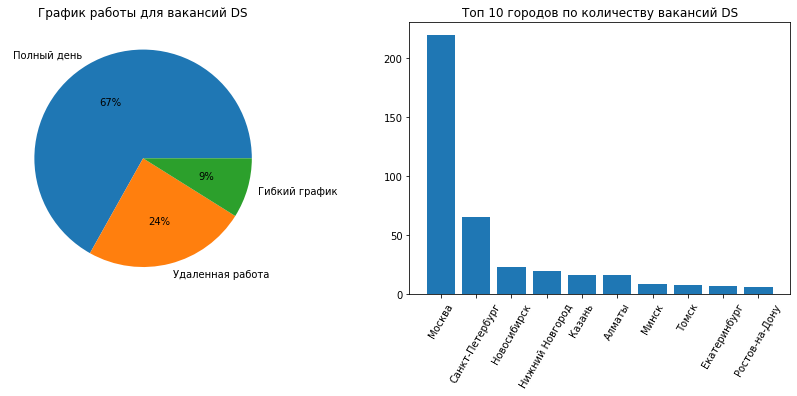

In [296]:
query_7_1 = f'''select v.id, a.name area_name, e.name employer, v.schedule schedule
    from vacancies v
    join employers e on e.id = v.employer_id
    join areas a on a.id = v.area_id
    where v.name like '%ata%cientist%' or 
    v.name like '%ata%cience%' or 
    v.name like '%сследователь%анных%' or 
    v.name like '%ML%' and v.name not like '%HTML%' or 
    v.name like '%achine%earning%' or 
    v.name like '%ашинн%бучен%' 
    
    group by v.id, e.id, a.id
   
    
'''
vacancies_data_science_total = pd.read_sql_query(query_7_1, connection)
vacancy_area = vacancies_data_science_total.groupby('area_name')['id'].count().sort_values(ascending=False).head(10)
vacancy_schedule = vacancies_data_science_total.groupby('schedule')['id'].count().sort_values(ascending=False)
vacancy_piv = vacancies_data_science_total.pivot_table(values='id', index='area_name', columns='schedule', aggfunc='count', fill_value=0).round()
vacancy_piv['Всего'] = vacancy_piv['Гибкий график'] + vacancy_piv['Полный день'] + vacancy_piv['Удаленная работа']


import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axes[0].pie(
    vacancy_schedule,
    labels=vacancy_schedule.index,
    autopct='%.0f%%', 
    )
axes[0].set_title ('График работы для вакансий DS');

axes[1].bar(x=vacancy_area.index, height=vacancy_area)
axes[1].xaxis.set_tick_params(rotation=60)
axes[1].set_title ('Топ 10 городов по количеству вакансий DS');

In [298]:
vacancy_piv.sort_values(by='Всего', ascending=False).head(10)

schedule,Гибкий график,Полный день,Удаленная работа,Всего
area_name,,,,
Москва,11,162,46,219
Санкт-Петербург,8,45,12,65
Новосибирск,5,13,5,23
Нижний Новгород,3,14,3,20
Казань,1,10,5,16
Алматы,0,12,4,16
Минск,1,7,1,9
Томск,3,4,1,8
Екатеринбург,1,4,2,7


Большинство вакансий DS предполагают полный рабочий день и расположены в Москве, поэтому будут интересны или жителям Москвы или согласным на переезд кандидатам. Четверть вакансий предполагают удаленную работу, поэтому могут быть предложены любым подходящим кандидатам.

Количество вакансий в DS относительно общей базы данных вакансий в IT небольшое, около 1%, при этом большинство вакансий предлагают в гг. Москва и Санкт Петербург. Исходя из этой базы данных можно составить представление о рынке труда в DS в этих двух городах, для анализа региональных вакансий данных недостаточно.

Поскольку региональных вакансий очень мало, чтобы рассчитать ориентировочную зарплату в зависимости от региона, можно рассчитать среднюю зарплату по всей базе данных в зависимости от региона и опыта и исходя из этих данных предположить зарплату для вакансий в DS.

Также можно провести исследование по ключевым навыкам, требуемым на вакансии в области DS.

